In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("EDADV DATASET1.csv")

In [5]:
df.head(10)

,Date,Particular,Colour,Size_(mm),Quantity,Rate_Per_No,Basic_Amount,GST_(18%),Total_Amount,Location
0,02-04-2019,PVC Pipe,Grey,110,175,600,105000,18900,123900,Mohol
1,02-04-2019,PVC Pipe,Grey,110,35,600,21000,3780,24780,Mohol
2,02-04-2019,PVC Pipe,Grey,90,306,408,124848,22473,147321,Mohol
3,02-04-2019,PVC Pipe,Grey,75,160,285,45600,8208,53808,Mohol
4,02-04-2019,PVC Pipe,Grey,63,700,208,145530,26195,171725,Mohol
5,02-04-2019,PVC Pipe,Grey,110,451,600,270600,48708,319308,Mohol
6,02-04-2019,PVC Tee,Black,90,3000,49,147000,26460,173460,Mohol
7,02-04-2019,PVC Reducer,Milky White,90,2520,37,93240,16783,110023,Mohol
8,02-04-2019,PVC Pipe,Grey,110,29,600,17400,3132,20532,Mohol
9,02-04-2019,PVC Tee,Black,90,3000,49,147000,26460,173460,Mohol


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          3936 non-null   object
 1   Particular    3936 non-null   object
 2   Colour        3936 non-null   object
 3   Size_(mm)     3936 non-null   int64 
 4   Quantity      3936 non-null   int64 
 5   Rate_Per_No   3936 non-null   int64 
 6   Basic_Amount  3936 non-null   int64 
 7   GST_(18%)     3936 non-null   int64 
 8   Total_Amount  3936 non-null   int64 
 9   Location      3936 non-null   object
dtypes: int64(6), object(4)
memory usage: 307.6+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

print(df.dtypes)
print(df['Date'].head())

Date            datetime64[ns]
Particular              object
Colour                  object
Size_(mm)                int64
Quantity                 int64
Rate_Per_No              int64
Basic_Amount             int64
GST_(18%)                int64
Total_Amount             int64
Location                object
dtype: object
0   2019-04-02
1   2019-04-02
2   2019-04-02
3   2019-04-02
4   2019-04-02
Name: Date, dtype: datetime64[ns]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3936 non-null   datetime64[ns]
 1   Particular    3936 non-null   object        
 2   Colour        3936 non-null   object        
 3   Size_(mm)     3936 non-null   int64         
 4   Quantity      3936 non-null   int64         
 5   Rate_Per_No   3936 non-null   int64         
 6   Basic_Amount  3936 non-null   int64         
 7   GST_(18%)     3936 non-null   int64         
 8   Total_Amount  3936 non-null   int64         
 9   Location      3936 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 307.6+ KB


In [92]:
df.isnull().sum()

Date                     0
Particular               0
Colour                   0
Size_(mm)                0
Quantity                 0
Rate_Per_No              0
Basic_Amount             0
GST_(18%)                0
Total_Amount             0
Location                 0
Unit_Price_Calculated    0
Particular_LE            0
Colour_LE                0
Location_LE              0
Cluster                  0
Standard_Price           0
Price_Deviation          0
Particular_Colour        0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df['Unit_Price_Calculated'] = df['Basic_Amount'] / df['Quantity']
df

,Date,Particular,Colour,Size_(mm),Quantity,Rate_Per_No,Basic_Amount,GST_(18%),Total_Amount,Location,Unit_Price_Calculated
0,2019-04-02,PVC Pipe,Grey,110,175,600,105000,18900,123900,Mohol,600.0
1,2019-04-02,PVC Pipe,Grey,110,35,600,21000,3780,24780,Mohol,600.0
2,2019-04-02,PVC Pipe,Grey,90,306,408,124848,22473,147321,Mohol,408.0
3,2019-04-02,PVC Pipe,Grey,75,160,285,45600,8208,53808,Mohol,285.0
4,2019-04-02,PVC Pipe,Grey,63,700,208,145530,26195,171725,Mohol,207.9
...,...,...,...,...,...,...,...,...,...,...,...
3931,2019-09-30,PVC Pipe,Grey,63,1400,204,286160,51509,337669,Mohol,204.4
3932,2019-09-30,PVC Pipe,Grey,40,200,117,23360,4205,27565,Mohol,116.8
3933,2019-09-30,PVC Pipe,Grey,63,1400,204,286160,51509,337669,Mohol,204.4
3934,2019-09-30,PVC Pipe,Grey,63,1400,204,286160,51509,337669,Mohol,204.4


In [175]:
df['Unit_Price_Calculated'] = df['Basic_Amount'] / df['Quantity']
mismatch_count = ((df['Unit_Price_Calculated'] - df['Rate_Per_No']).abs().between(0.2, 0.5)).sum()

print(mismatch_count)

1756


In [41]:
df['Colour'].unique()

array(['Grey ', 'Black', 'Milky White', 'White', 'Silver', ' White'],
      dtype=object)

In [42]:
df['Colour'] = df['Colour'].str.strip().str.title()

In [158]:
df['Colour'].unique()

array(['Grey', 'Black', 'Milky White', 'White', 'Silver'], dtype=object)

In [130]:
df.loc[df['Location'] == 'SALEM', 'Location'] = 'Salem'

In [131]:
df['Location'].unique()

array(['Mohol', 'Nandigama', 'Salem', 'Vadodara', 'Anantpur',
       'Aurangabad', 'Pune', 'Akola', 'Hubli', 'Mumbai', 'Solapur',
       'Guntur', 'Chennai', 'Hyderabad', 'Coimbator'], dtype=object)

In [132]:
df['Particular'].unique()

array(['PVC Pipe', 'PVC Tee', 'PVC Reducer', 'PVC Tail', 'Pvc Pipe',
       'Column Pipe', 'PVC Service', 'End Cap', 'PVC Elbow', 'PVC MTA',
       'Male Coupler', 'PVC FTA'], dtype=object)

In [133]:
df['Particular'] = df['Particular'].replace({'Pvc Pipe': 'PVC Pipe'})

In [134]:
df['Particular'].unique()

array(['PVC Pipe', 'PVC Tee', 'PVC Reducer', 'PVC Tail', 'Column Pipe',
       'PVC Service', 'End Cap', 'PVC Elbow', 'PVC MTA', 'Male Coupler',
       'PVC FTA'], dtype=object)

In [135]:
le = LabelEncoder()

df['Particular_LE'] = le.fit_transform(df['Particular'])
df['Colour_LE'] = le.fit_transform(df['Colour'])
df['Location_LE'] = le.fit_transform(df['Location'])
df.head(10)

,Date,Particular,Colour,Size_(mm),Quantity,Rate_Per_No,Basic_Amount,GST_(18%),Total_Amount,Location,Unit_Price_Calculated,Particular_LE,Colour_LE,Location_LE,Cluster,Standard_Price,Price_Deviation,Particular_Colour
0,2019-04-02,PVC Pipe,Grey,110,175,600,105000,18900,123900,Mohol,600.0,6,1,8,1,601.0,-1.0,PVC Pipe - Grey
1,2019-04-02,PVC Pipe,Grey,110,35,600,21000,3780,24780,Mohol,600.0,6,1,8,1,601.0,-1.0,PVC Pipe - Grey
2,2019-04-02,PVC Pipe,Grey,90,306,408,124848,22473,147321,Mohol,408.0,6,1,8,1,387.0,21.0,PVC Pipe - Grey
3,2019-04-02,PVC Pipe,Grey,75,160,285,45600,8208,53808,Mohol,285.0,6,1,8,0,277.0,8.0,PVC Pipe - Grey
4,2019-04-02,PVC Pipe,Grey,63,700,208,145530,26195,171725,Mohol,207.9,6,1,8,0,204.0,4.0,PVC Pipe - Grey
5,2019-04-02,PVC Pipe,Grey,110,451,600,270600,48708,319308,Mohol,600.0,6,1,8,1,601.0,-1.0,PVC Pipe - Grey
6,2019-04-02,PVC Tee,Black,90,3000,49,147000,26460,173460,Mohol,49.0,10,0,8,0,49.0,0.0,PVC Tee - Black
7,2019-04-02,PVC Reducer,Milky White,90,2520,37,93240,16783,110023,Mohol,37.0,7,2,8,0,37.0,0.0,PVC Reducer - Milky White
8,2019-04-02,PVC Pipe,Grey,110,29,600,17400,3132,20532,Mohol,600.0,6,1,8,1,601.0,-1.0,PVC Pipe - Grey
9,2019-04-02,PVC Tee,Black,90,3000,49,147000,26460,173460,Mohol,49.0,10,0,8,0,49.0,0.0,PVC Tee - Black


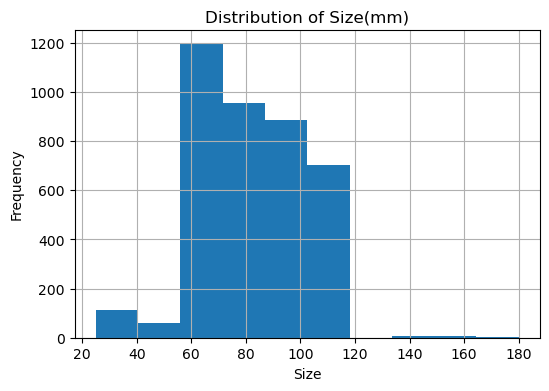

In [136]:
df['Size_(mm)'].hist(figsize=(6,4))
plt.title("Distribution of Size(mm)")
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.show()

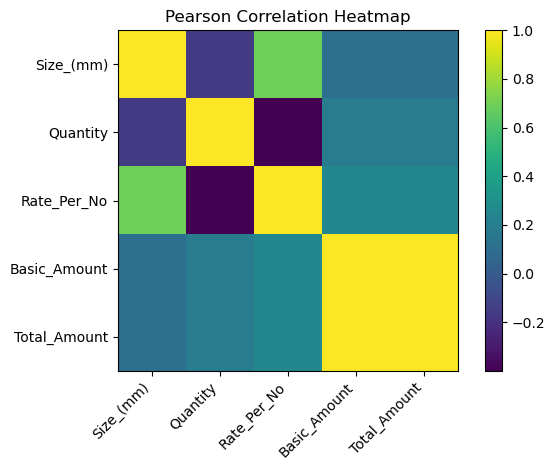

In [137]:
import matplotlib.pyplot as plt
num_cols = ["Size_(mm)", "Quantity", "Rate_Per_No", "Basic_Amount", "Total_Amount"]
corr = df[num_cols].corr(method="pearson")

plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.title("Pearson Correlation Heatmap")
plt.tight_layout()
plt.show()

In [138]:
cols = ["Basic_Amount", "GST_(18%)", "Total_Amount"]
corr = df[cols].corr()
print("Pearson Correlation Matrix:\n")
print(corr)

Pearson Correlation Matrix:

              Basic_Amount  GST_(18%)  Total_Amount
Basic_Amount           1.0        1.0           1.0
GST_(18%)              1.0        1.0           1.0
Total_Amount           1.0        1.0           1.0


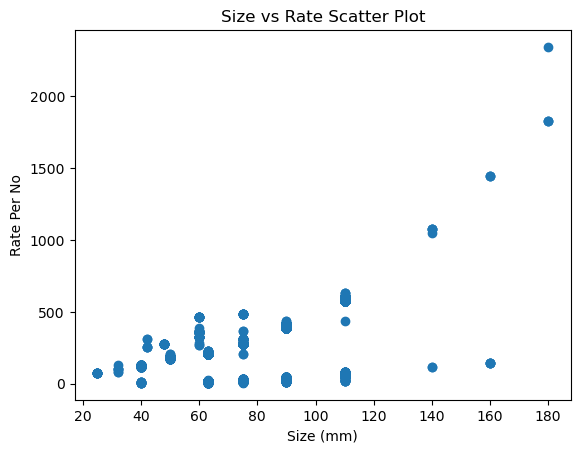

In [139]:
plt.scatter(df["Size_(mm)"], df["Rate_Per_No"])
plt.xlabel("Size (mm)")
plt.ylabel("Rate Per No")
plt.title("Size vs Rate Scatter Plot")
plt.show()

In [ ]:
The price increases with pipe size, but not in a perfectly linear way. The relationship is moderately strong, not exact.

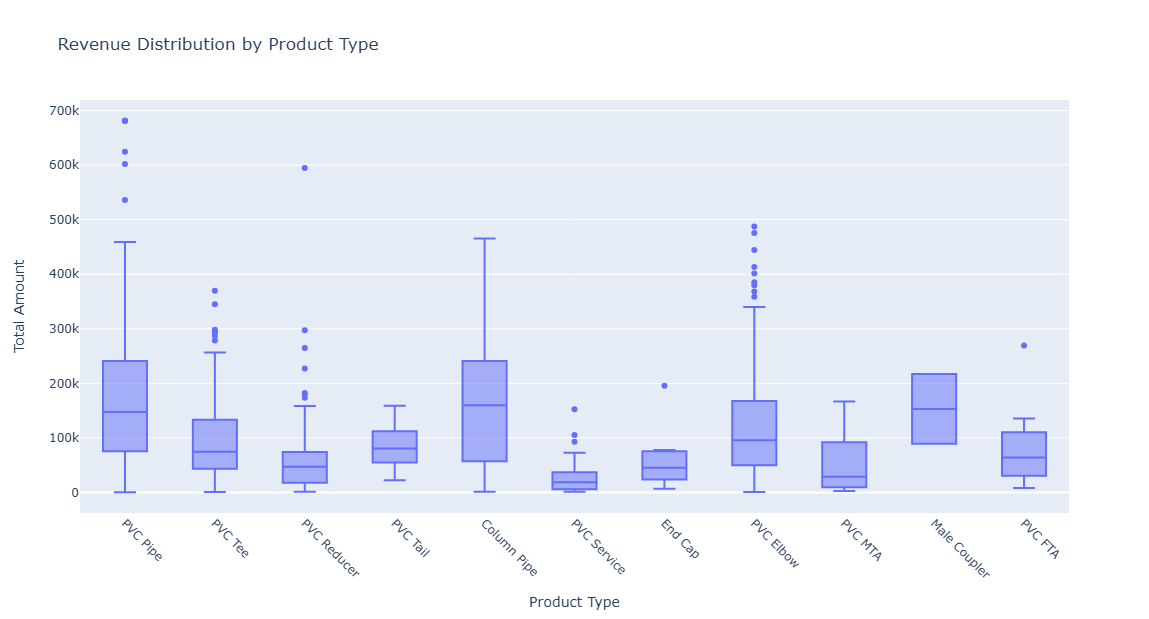

In [207]:
import plotly.express as px
fig = px.box(df,x='Particular',y='Total_Amount',title="Revenue Distribution by Product Type",)
fig.update_layout(width=1200,height=600,xaxis_title="Product Type",yaxis_title="Total Amount",)
fig.update_xaxes(tickangle=45)
fig.show()

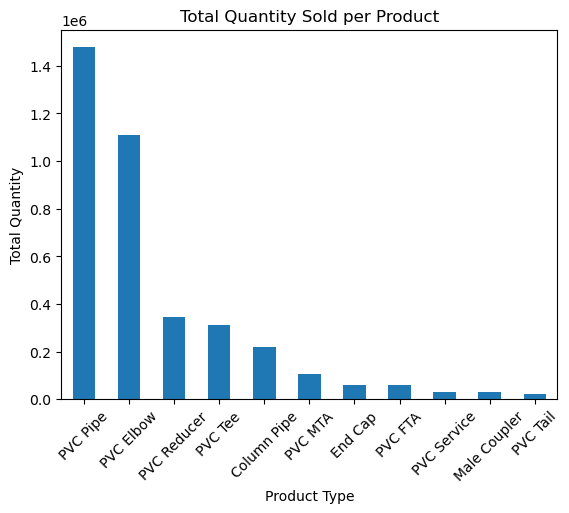

In [192]:
qty = df.groupby('Particular')['Quantity'].sum().sort_values(ascending=False)
qty.plot(kind='bar')
plt.title("Total Quantity Sold per Product")
plt.xlabel("Product Type")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()


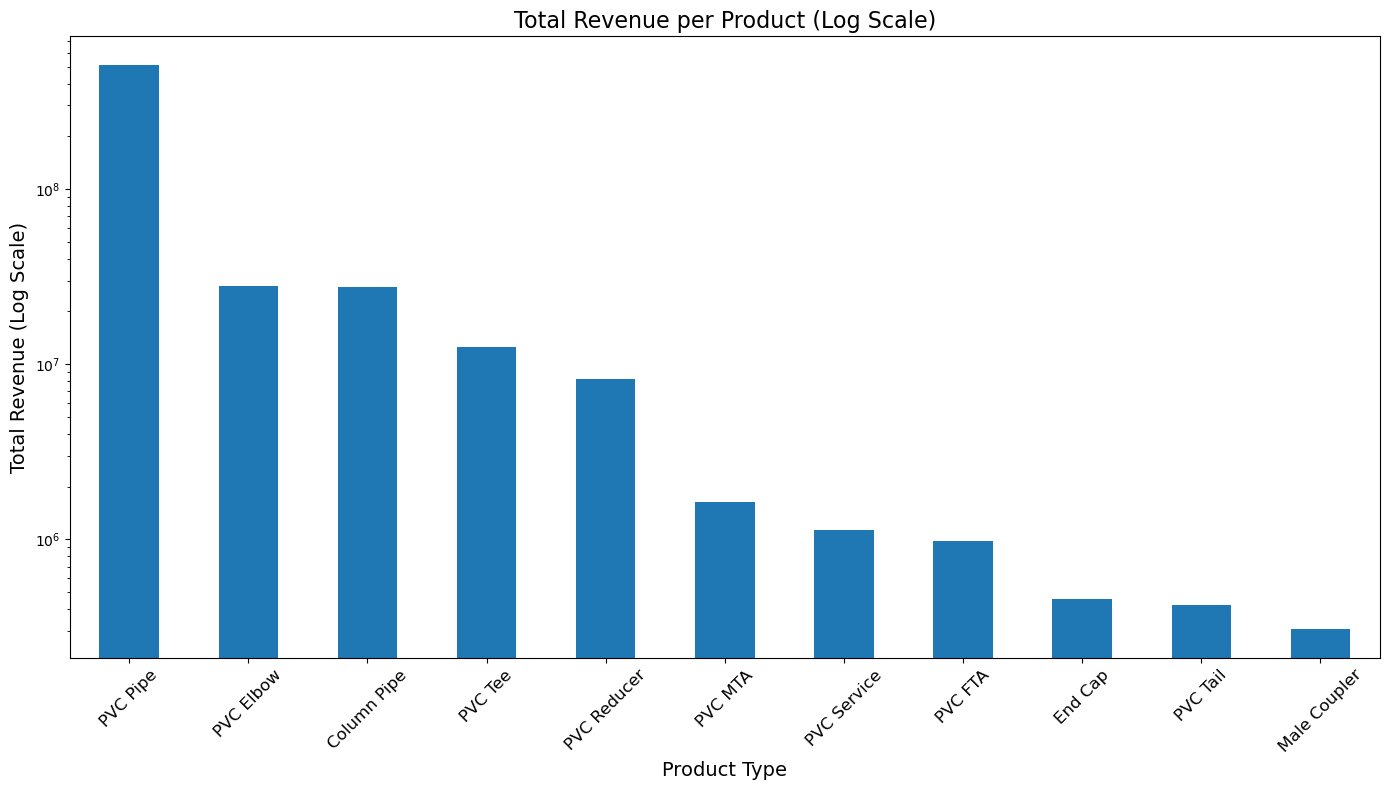

In [212]:
plt.figure(figsize=(14, 8))

revenue = df.groupby('Particular')['Total_Amount'].sum().sort_values(ascending=False)
revenue.plot(kind='bar')
plt.yscale('log')
plt.title("Total Revenue per Product (Log Scale)", fontsize=16)
plt.xlabel("Product Type", fontsize=14)
plt.ylabel("Total Revenue (Log Scale)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

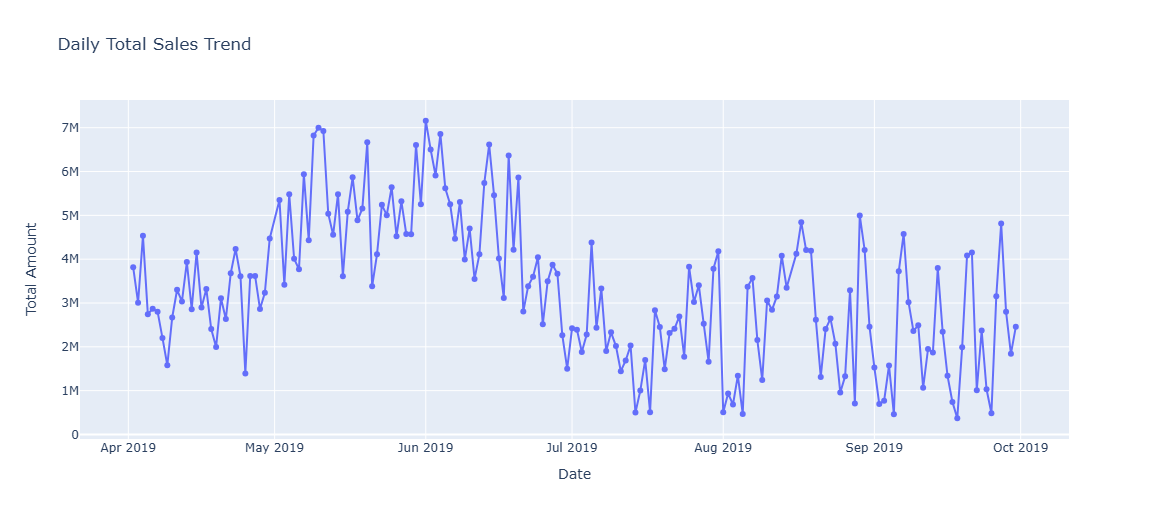

In [206]:
daily_sales = df.groupby('Date')['Total_Amount'].sum().reset_index()
fig = px.line(daily_sales,x='Date',y='Total_Amount',title="Daily Total Sales Trend",markers=True)
fig.update_layout(width=1200,height=500,xaxis_title="Date",yaxis_title="Total Amount",showlegend=False)
fig.show()

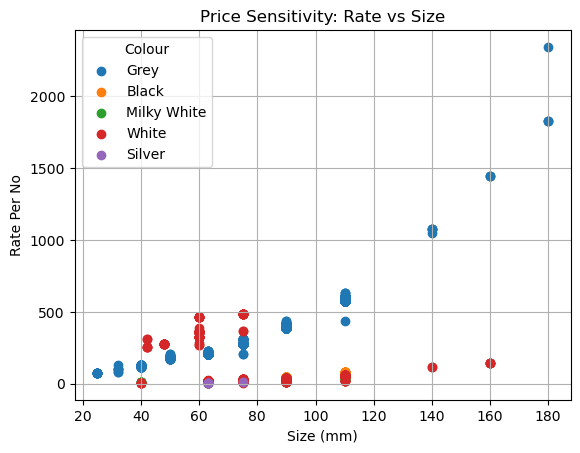

In [143]:
colours = df['Colour'].unique()
for c in colours:
    subset = df[df['Colour'] == c]
    plt.scatter(subset['Size_(mm)'], subset['Rate_Per_No'], label=c)

plt.title("Price Sensitivity: Rate vs Size")
plt.xlabel("Size (mm)")
plt.ylabel("Rate Per No")
plt.legend(title="Colour")
plt.grid(True)
plt.show()

In [144]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Quantity', 'Rate_Per_No', 'Size_(mm)', 'Total_Amount']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])
print(df_scaled[num_cols].head())


   Quantity  Rate_Per_No  Size_(mm)  Total_Amount
0 -0.376239     1.625017   1.554063     -0.262456
1 -0.443629     1.625017   1.554063     -1.217627
2 -0.313180     0.598758   0.523389     -0.036759
3 -0.383459    -0.058689  -0.249616     -0.937898
4 -0.123523    -0.470261  -0.868021      0.198411


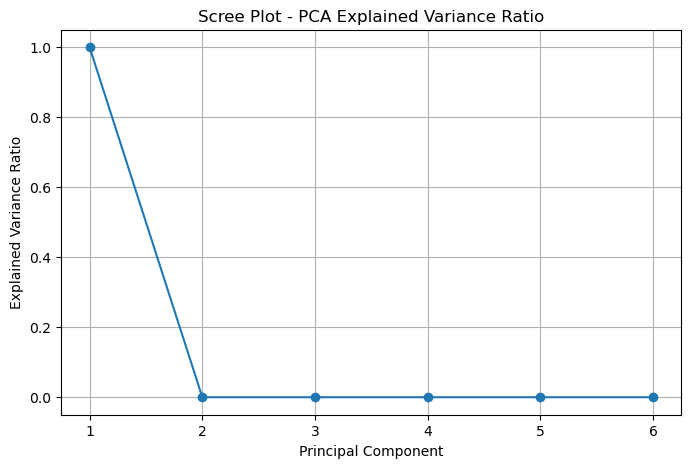

In [145]:
from sklearn.decomposition import PCA
num_cols = ['Quantity','Rate_Per_No','Size_(mm)','Basic_Amount','GST_(18%)','Total_Amount']
data_pca = df_scaled[num_cols]

pca = PCA()
pca.fit(data_pca)

expl_var = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(expl_var)+1), expl_var, marker='o')
plt.title("Scree Plot - PCA Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

In [146]:
pca_2 = PCA(n_components=2)
pcs = pca_2.fit_transform(data_pca)

df_pca = df.copy()
df_pca['PC1'] = pcs[:,0]
df_pca['PC2'] = pcs[:,1]

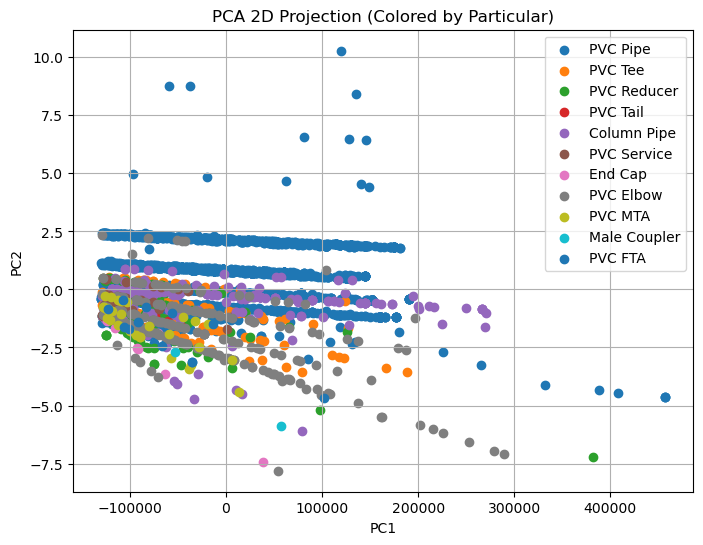

In [199]:
plt.figure(figsize=(8,6))
for cat in df_pca['Particular'].unique():
    subset = df_pca[df_pca['Particular'] == cat]
    plt.scatter(subset['PC1'], subset['PC2'], label=cat)

plt.title("PCA 2D Projection (Colored by Particular)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


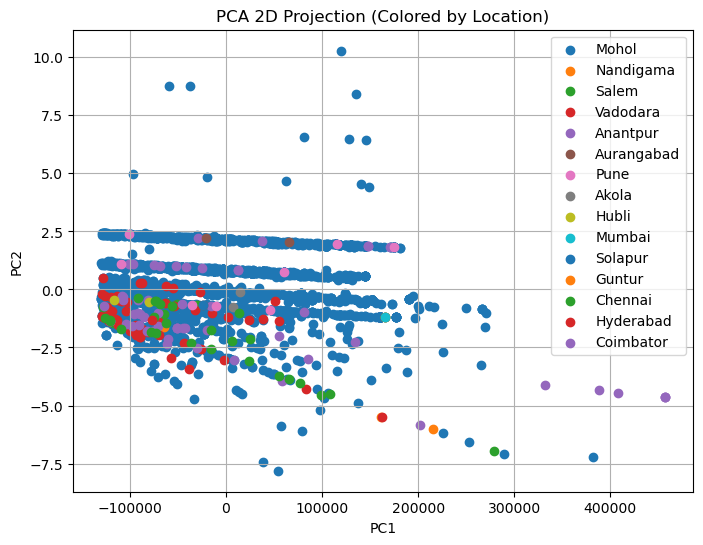

In [148]:
plt.figure(figsize=(8,6))

for loc in df_pca['Location'].unique():
    subset = df_pca[df_pca['Location'] == loc]
    plt.scatter(subset['PC1'], subset['PC2'], label=loc)

plt.title("PCA 2D Projection (Colored by Location)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


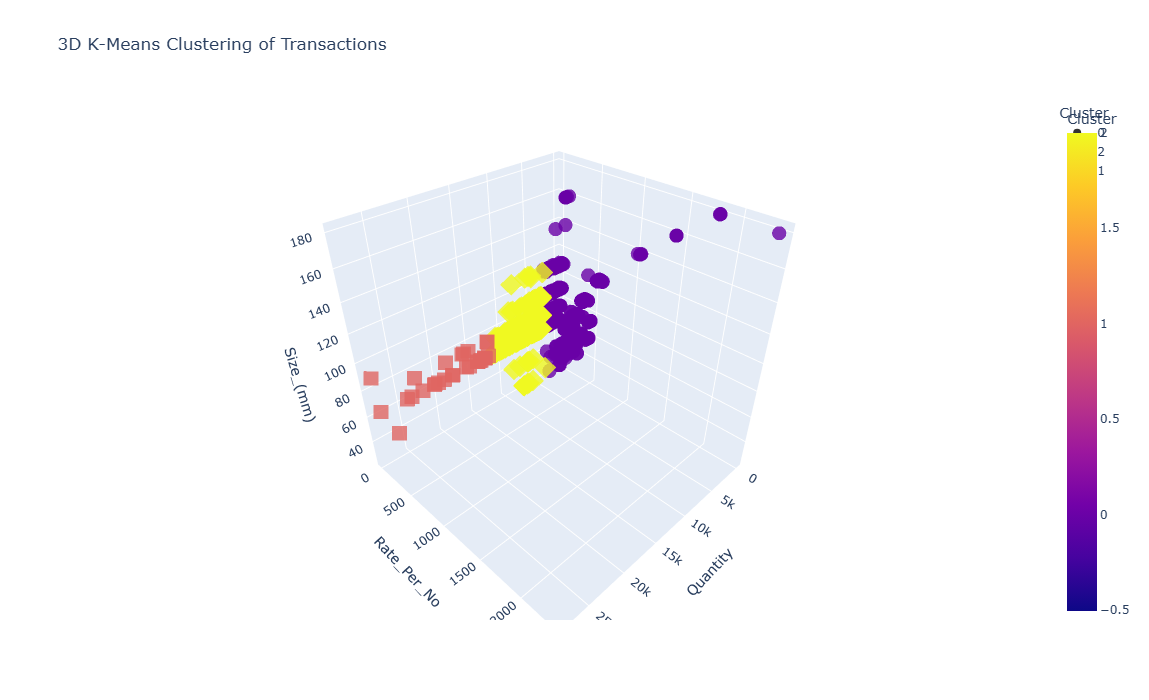

In [208]:
fig = px.scatter_3d(df,x='Quantity',y='Rate_Per_No',z='Size_(mm)',color='Cluster',title="3D K-Means Clustering of Transactions",symbol='Cluster',opacity=0.8,height=700)
fig.show()

In [150]:
df.groupby('Colour')['Total_Amount'].mean().sort_values(ascending=False)

Colour
Grey           160950.860538
White          123788.571429
Black           99014.215385
Silver          64994.428571
Milky White     63187.608000
Name: Total_Amount, dtype: float64

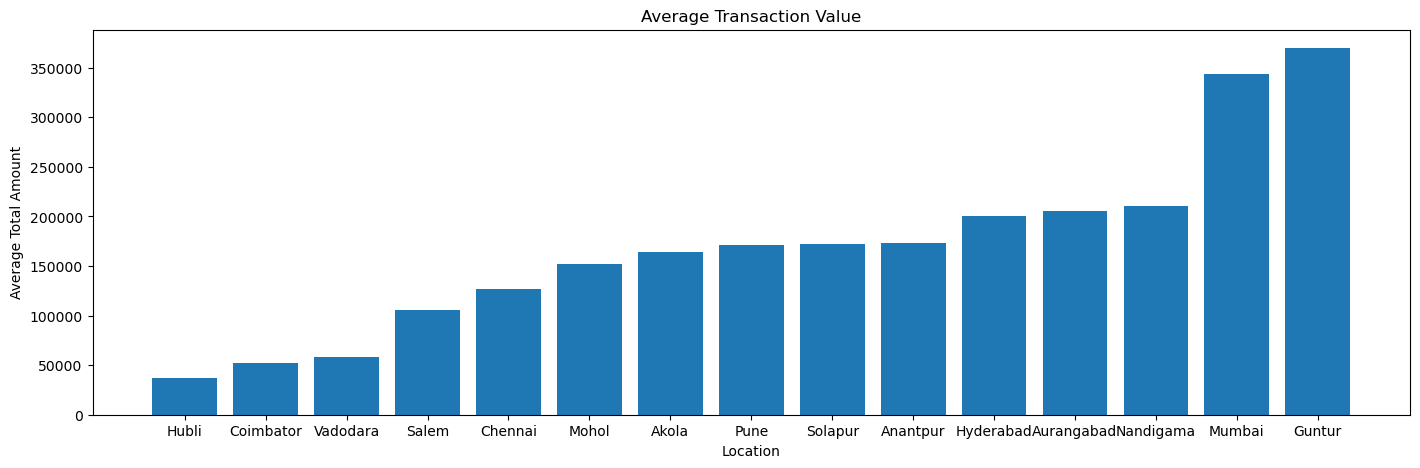

In [196]:
avg_location = df.groupby('Location')['Total_Amount'].mean().sort_values(ascending=True)
plt.figure(figsize=(17,5))
plt.bar(avg_location.index, avg_location.values)
plt.title("Average Transaction Value")
plt.xlabel("Location")
plt.ylabel("Average Total Amount")
plt.xticks(rotation=0)
plt.show()

In [153]:
size_sales = df.groupby('Size_(mm)')['Quantity'].sum().sort_values(ascending=False)
size_sales

Size_(mm)
63     1575821
75     1014055
90      634628
110     284229
40      117023
60       48455
25       47075
50       20519
48        8310
32        6550
140       3041
42        2595
160       2578
180        336
Name: Quantity, dtype: int64

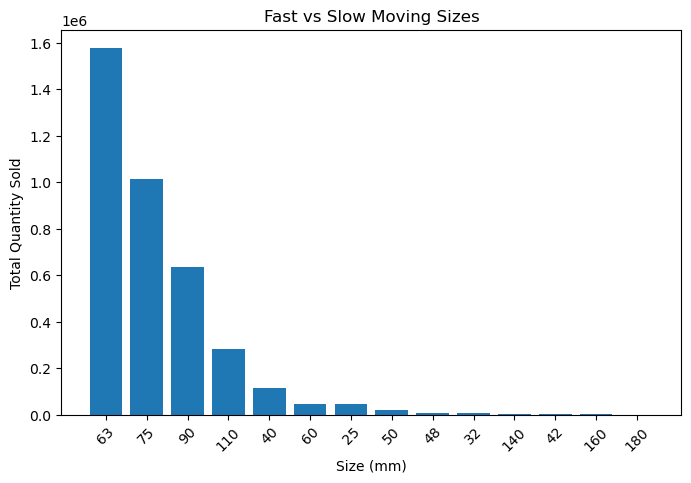

In [154]:
size_sales = df.groupby('Size_(mm)')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(size_sales.index.astype(str), size_sales.values)
plt.title("Fast vs Slow Moving Sizes")
plt.xlabel("Size (mm)")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()


In [155]:
df['GST_(18%)'].sum()

90742857

In [156]:
price_ref = df.groupby(['Particular', 'Size_(mm)'])['Rate_Per_No'].median()
df['Standard_Price'] = df.set_index(['Particular', 'Size_(mm)']).index.map(price_ref)
df['Price_Deviation'] = df['Rate_Per_No'] - df['Standard_Price']
anomalies = df[df['Price_Deviation'] != 0]
anomalies

,Date,Particular,Colour,Size_(mm),Quantity,Rate_Per_No,Basic_Amount,GST_(18%),Total_Amount,Location,Unit_Price_Calculated,Particular_LE,Colour_LE,Location_LE,Cluster,Standard_Price,Price_Deviation,Particular_Colour
0,2019-04-02,PVC Pipe,Grey,110,175,600,105000,18900,123900,Mohol,600.0,6,1,8,1,601.0,-1.0,PVC Pipe - Grey
1,2019-04-02,PVC Pipe,Grey,110,35,600,21000,3780,24780,Mohol,600.0,6,1,8,1,601.0,-1.0,PVC Pipe - Grey
2,2019-04-02,PVC Pipe,Grey,90,306,408,124848,22473,147321,Mohol,408.0,6,1,8,1,387.0,21.0,PVC Pipe - Grey
3,2019-04-02,PVC Pipe,Grey,75,160,285,45600,8208,53808,Mohol,285.0,6,1,8,0,277.0,8.0,PVC Pipe - Grey
4,2019-04-02,PVC Pipe,Grey,63,700,208,145530,26195,171725,Mohol,207.9,6,1,8,0,204.0,4.0,PVC Pipe - Grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2019-09-29,PVC Pipe,Grey,75,313,285,89205,16057,105262,Mohol,285.0,6,1,8,0,277.0,8.0,PVC Pipe - Grey
3915,2019-09-29,PVC Pipe,Grey,90,472,416,196352,35343,231695,Mohol,416.0,6,1,8,1,387.0,29.0,PVC Pipe - Grey
3923,2019-09-30,PVC Reducer,Milky White,75,2976,30,89280,16070,105350,Mohol,30.0,7,2,8,0,12.0,18.0,PVC Reducer - Milky White
3925,2019-09-30,PVC Reducer,Milky White,63,9100,9,81900,14742,96642,Mohol,9.0,7,2,8,2,8.0,1.0,PVC Reducer - Milky White


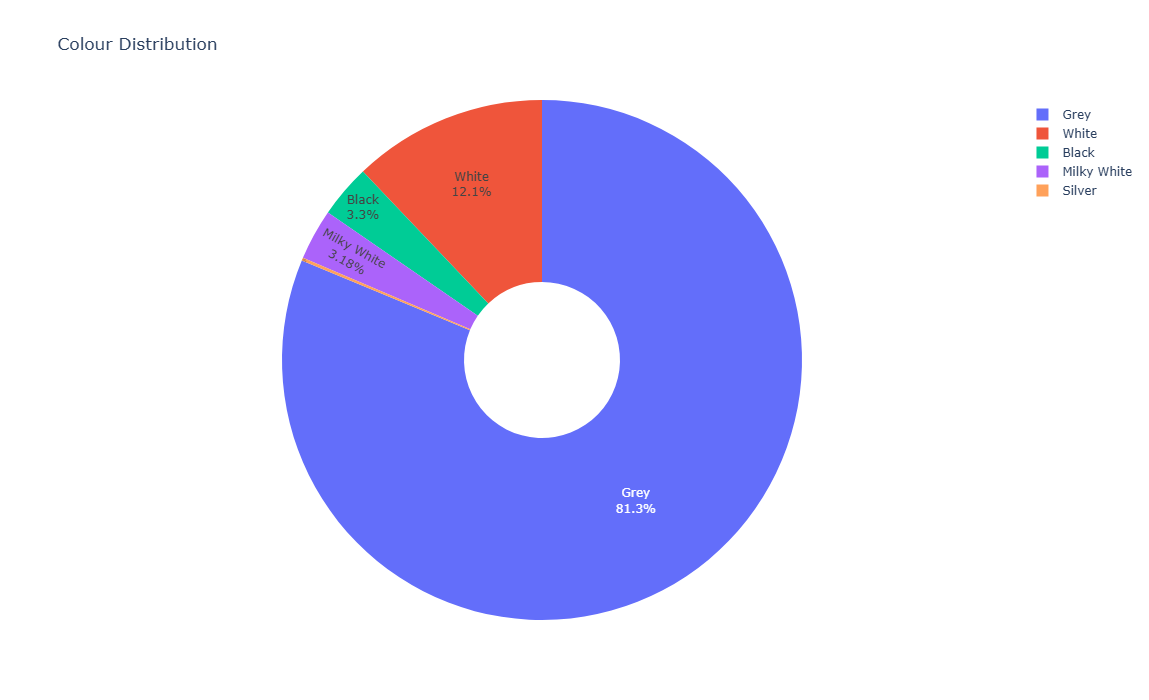

Colour Distribution Details:

Grey: 3198 items (81.2%)
White: 476 items (12.1%)
Black: 130 items (3.3%)
Milky White: 125 items (3.2%)
Silver: 7 items (0.2%)


In [211]:
colour_counts = df['Colour'].value_counts().reset_index()
colour_counts.columns = ['Colour', 'Count']
fig = px.pie(colour_counts,names='Colour',values='Count',title="Colour Distribution",hole=0.3)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(width=700,height=700,showlegend=True)
fig.show()
print("Colour Distribution Details:\n")
for colour, count in zip(colour_counts['Colour'], colour_counts['Count']):
    percentage = (count / colour_counts['Count'].sum()) * 100
    print(f"{colour}: {count} items ({percentage:.1f}%)")